##Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Loading the Dataset

In [ ]:
train_df =pd.read_csv("train_MpHjUjU.csv")
test_df = pd.read_csv("test_hXY9mYw.csv")

##General Inspection

In [ ]:
train_df.shape

(19104, 13)

##Creation of Test Data

In [ ]:
test_data = pd.merge(test_df, train_df, how='left')
test_data.shape

(8588, 13)

##Filtering of Train Set

In [ ]:
train_data = pd.merge(train_df, test_data, indicator=True, how='outer').query('_merge=="left_only" ').drop('_merge', axis=1)
train_data.shape

(10516, 13)

In [ ]:
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1


In [ ]:
test_data.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2


## Creation of Target Column

- O for Emp who are still with Organization
- 1 for the Emp who have left the Organization

In [ ]:
train_data['Attrition'] = train_data['LastWorkingDate']

In [ ]:
train_data.loc[train_data['Attrition'].notnull(), 'Attrition'] = 1
train_data['Attrition'].fillna(0, inplace=True)

In [ ]:
train_data.isnull().sum()

MMM-YY                     0
Emp_ID                     0
Age                        0
Gender                     0
City                       0
Education_Level            0
Salary                     0
Dateofjoining              0
LastWorkingDate         8900
Joining Designation        0
Designation                0
Total Business Value       0
Quarterly Rating           0
Attrition                  0
dtype: int64

In [ ]:
test_data.isnull().sum()

Emp_ID                     0
MMM-YY                     0
Age                        0
Gender                     0
City                       0
Education_Level            0
Salary                     0
Dateofjoining              0
LastWorkingDate         8588
Joining Designation        0
Designation                0
Total Business Value       0
Quarterly Rating           0
dtype: int64

In [ ]:
train_data['Attrition'].value_counts()

0    8900
1    1616
Name: Attrition, dtype: int64

## Feature Engineering

In [ ]:
# Train Data
# Createing one new feature based on joining designation and designation
train_data['DesignationChange']=train_data["Designation"] - train_data["Joining Designation"]
#printing count and unique vales
print(train_data.DesignationChange.nunique())
print(train_data.DesignationChange.unique())
# Assigning any value 
# train_data['DesignationChange'].values[train_data['DesignationChange'] > 1] = 1

# print(train_data.DesignationChange.nunique())
# print(train_data.DesignationChange.unique())

5
[0 3 1 2 4]


In [ ]:
# Test Data

test_data['DesignationChange']=test_data["Designation"] - test_data["Joining Designation"]

print(test_data.DesignationChange.nunique())
print(test_data.DesignationChange.unique())

# test_data['DesignationChange'].values[test_data['DesignationChange'] > 1] = 1

# print(test_data.DesignationChange.nunique())
# print(test_data.DesignationChange.unique())

5
[2 3 1 0 4]


In [ ]:
# Extracting Year from date of joining
train_data['yearDOJ'] = pd.DatetimeIndex(train_data['Dateofjoining']).year
test_data['yearDOJ'] = pd.DatetimeIndex(test_data['Dateofjoining']).year

##Data Wrangling

In [ ]:
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0


In [ ]:
test_data.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2


## Checkpoint for dataset

In [ ]:

train_copied = train_data.copy()
test_copied = test_data.copy()

In [ ]:
# train.drop(['MMM-YY','Emp_ID', 'City','Dateofjoining',
#        'LastWorkingDate'], inplace=True, axis=1)
# test.drop(['MMM-YY','City','Dateofjoining',
#        'LastWorkingDate'], inplace=True, axis=1)
# test.set_index("Emp_ID", inplace=True)

## Data Pre-Processing

In [ ]:
train = pd.get_dummies(train_data, columns=['Education_Level'], drop_first=True)
train = pd.get_dummies(train, columns=['Gender'], drop_first=True)
test = pd.get_dummies(test_data, columns=['Education_Level'], drop_first=True)
test = pd.get_dummies(test, columns=['Gender'], drop_first=True)

In [ ]:
train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'City', 'Salary', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'Attrition',
       'DesignationChange', 'yearDOJ', 'Education_Level_College',
       'Education_Level_Master', 'Gender_Male'],
      dtype='object')

In [ ]:
test.columns # need to work from here after final analysis


Index(['Emp_ID', 'MMM-YY', 'Age', 'City', 'Salary', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'DesignationChange',
       'yearDOJ', 'Education_Level_College', 'Education_Level_Master',
       'Gender_Male'],
      dtype='object')

In [ ]:
train.drop(['MMM-YY','Emp_ID', 'City','Dateofjoining','Joining Designation','Designation',
       'LastWorkingDate'], inplace=True, axis=1)
test.drop(['MMM-YY','City','Dateofjoining','Joining Designation','Designation',
       'LastWorkingDate'], inplace=True, axis=1)
test.set_index("Emp_ID", inplace=True)

In [ ]:
train_col = train.columns
test_col = test.columns

## Checkpoint after PreProcesing

In [ ]:
train_processed = train.copy()
test_processed = test.copy()

In [ ]:
X = train.drop(['Attrition'], axis=1)
y = train['Attrition']

In [ ]:
X.head()

,Age,Salary,Total Business Value,Quarterly Rating,DesignationChange,yearDOJ,Education_Level_College,Education_Level_Master,Gender_Male
0,28,57387,2381060,2,0,2015,0,1,1
1,28,57387,-665480,2,0,2015,0,1,1
2,28,57387,0,2,0,2015,0,1,1
5,43,65603,0,1,0,2016,0,1,1
6,43,65603,0,1,0,2016,0,1,1


In [ ]:
test.head()

,Age,Salary,Total Business Value,Quarterly Rating,DesignationChange,yearDOJ,Education_Level_College,Education_Level_Master,Gender_Male
Emp_ID,,,,,,,,,
394,32,97722,189360,1,2,2011,0,1,0
394,32,97722,390810,1,2,2011,0,1,0
394,32,97722,1846360,1,2,2011,0,1,0
394,33,97722,194010,2,2,2011,0,1,0
394,33,97722,371160,2,2,2011,0,1,0


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)
test= scale.fit_transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=42)

## Function to test different Model and there performance

In [ ]:
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)
    f1score = f1_score(y_test, y_pred, average='micro')

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')
    print('f1score of the model' ,Model, str(f1score)+ '%')

In [ ]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Importing relevant libraries

In [ ]:
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

### SVM

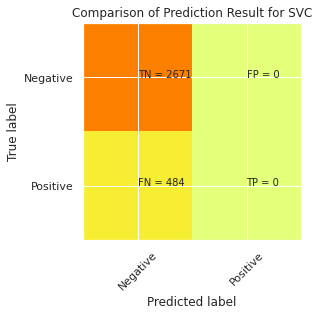

Accuracy of the Model SVC 84.7%
f1score of the model SVC 0.8465927099841521%


In [ ]:
Model = "SVC"
model=SVC()

train_test_ml_model(X_train,y_train,X_val,Model)

### Nu SVM

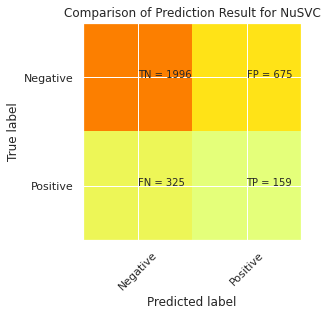

Accuracy of the Model NuSVC 68.3%
f1score of the model NuSVC 0.6830427892234548%


In [ ]:
Model = "NuSVC"
model=NuSVC(nu=0.150)

train_test_ml_model(X_train,y_train,X_val,Model)

### XGB Classifier

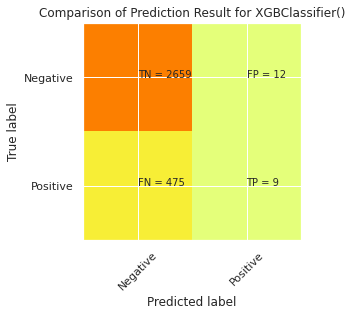

Accuracy of the Model XGBClassifier() 84.6%
f1score of the model XGBClassifier() 0.8456418383518225%


In [ ]:
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_val,Model)

### KNeighbors Classifier

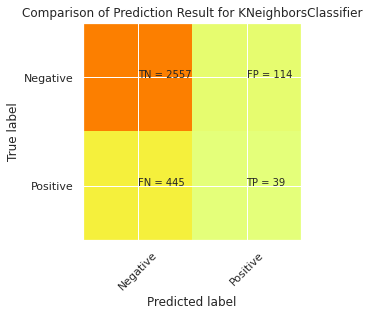

Accuracy of the Model KNeighborsClassifier 82.3%
f1score of the model KNeighborsClassifier 0.8228209191759113%


In [ ]:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_val,Model)

### Gaussian Naive 

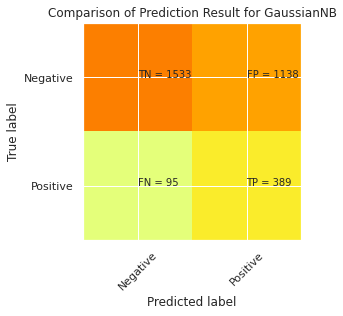

Accuracy of the Model GaussianNB 60.9%
f1score of the model GaussianNB 0.6091917591125198%


In [ ]:
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_val,Model)

### SGD Classifier

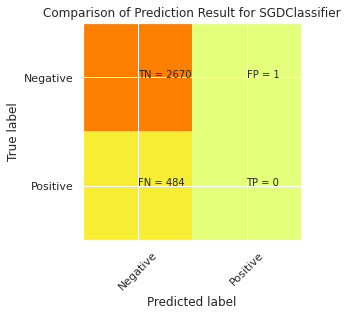

Accuracy of the Model SGDClassifier 84.6%
f1score of the model SGDClassifier 0.8462757527733756%


In [ ]:
Model = "SGDClassifier"
model=SGDClassifier()


train_test_ml_model(X_train,y_train,X_val,Model)

### Logistic Regression

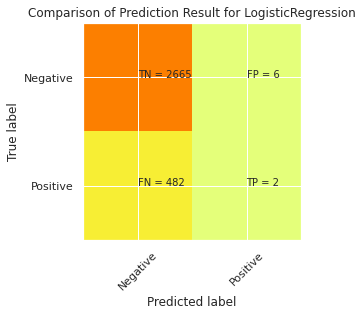

Accuracy of the Model LogisticRegression 84.5%
f1score of the model LogisticRegression 0.845324881141046%


In [ ]:
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_val,Model)

### Decision Tree

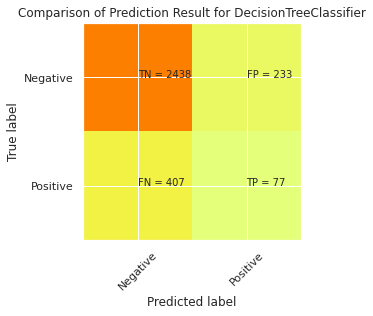

Accuracy of the Model DecisionTreeClassifier 79.7%
f1score of the model DecisionTreeClassifier 0.7971473851030111%


In [ ]:
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_val,Model)

### Extra Tree

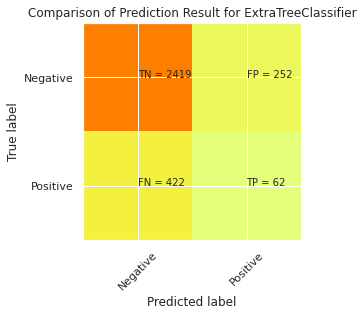

Accuracy of the Model ExtraTreeClassifier 78.6%
f1score of the model ExtraTreeClassifier 0.7863708399366087%


In [ ]:
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_val,Model)

### QDA

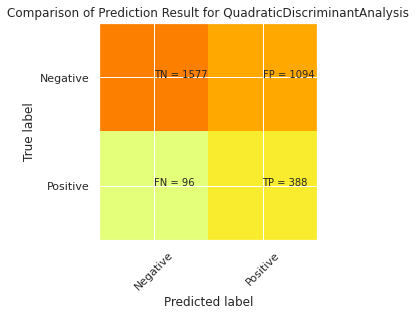

Accuracy of the Model QuadraticDiscriminantAnalysis 62.3%
f1score of the model QuadraticDiscriminantAnalysis 0.6228209191759112%


In [ ]:
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_val,Model)

### LDA

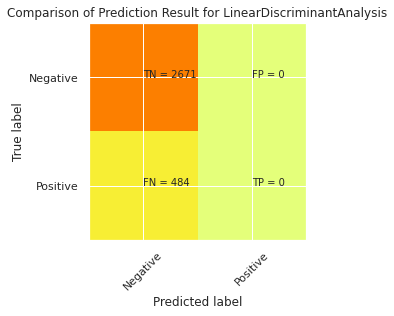

Accuracy of the Model LinearDiscriminantAnalysis 84.7%
f1score of the model LinearDiscriminantAnalysis 0.8465927099841521%


In [ ]:
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_val,Model)

### Random Forest

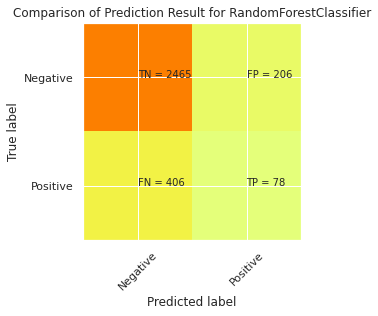

Accuracy of the Model RandomForestClassifier 80.6%
f1score of the model RandomForestClassifier 0.8060221870047543%


In [ ]:
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_val,Model)

### Ada Boost

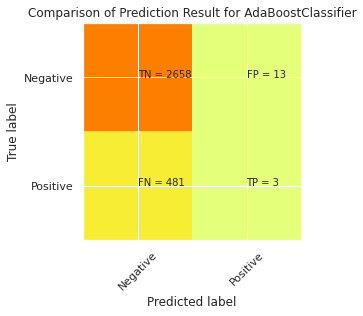

Accuracy of the Model AdaBoostClassifier 84.3%
f1score of the model AdaBoostClassifier 0.8434231378763867%


In [ ]:
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_val,Model)

### Gradient Boost

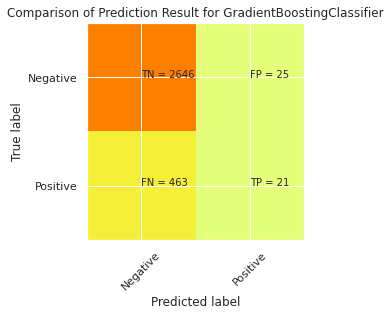

Accuracy of the Model GradientBoostingClassifier 84.5%
f1score of the model GradientBoostingClassifier 0.845324881141046%


In [ ]:
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_val,Model)

## Hyperparameter Tunning for Logistic and AdaBoost

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.8462165906608814


In [ ]:
y_pred_logistic = logreg_cv.predict(X_val)

In [ ]:
cm_logistic = confusion_matrix(y_test,y_pred_logistic )
accuracy_logistic = round(100*np.trace(cm_logistic)/np.sum(cm_logistic),1)
f1score_logistic = f1_score(y_test, y_pred_logistic , average='macro')

In [ ]:
print(cm_logistic)
print(accuracy_logistic)
print(f1score_logistic)

[[2671    0]
 [ 484    0]]
84.7
0.4584620665980089


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846217 using {'learning_rate': 0.0001, 'n_estimators': 10}
0.846217 (0.000504) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.846217 (0.000504) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.846217 (0.000504) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.846217 (0.000504) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.846217 (0.000504) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.846217 (0.000504) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.846217 (0.000504) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.846217 (0.000504) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.846217 (0.000504) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.846217 (0.000504) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.846217 (0.000504) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.846217 (0.000504) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.846217 (0.000504) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.8462

In [ ]:
y_pred_ada = grid_result.predict(X_val)

In [ ]:
cm_ada = confusion_matrix(y_test,y_pred_ada)
accuracy_ada = round(100*np.trace(cm_ada)/np.sum(cm_ada),1)
f1score_ada = f1_score(y_test, y_pred_ada, average='micro')

In [ ]:
print(cm_ada)
print(accuracy_ada)
print(f1score_ada)

[[2671    0]
 [ 484    0]]
84.7
0.8465927099841521


###Inference
there is negligible increase in accuracy, but model become biased.

## Model Analysis
LDA and SVM without any tuning yields 84.7% accuracy

### HYperparameter tuning of SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.846 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [ ]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_val)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2671
           1       0.00      0.00      0.00       484

    accuracy                           0.85      3155
   macro avg       0.42      0.50      0.46      3155
weighted avg       0.72      0.85      0.78      3155



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_svc=SVC(C= 0.1, gamma= 1, kernel='rbf')

In [ ]:
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_val)

In [ ]:

cm = confusion_matrix(y_test,y_pred)
accuracy = round(100*np.trace(cm)/np.sum(cm),1)
f1score = f1_score(y_test, y_pred, average='micro')

In [ ]:
print(cm)
print(accuracy)
print(f1score)

[[2671    0]
 [ 484    0]]
84.7
0.8465927099841521


In [ ]:
final_pred_test = grid.predict(test)
test_pred_svm= pd.DataFrame(final_pred_test, columns=['Target'])

In [ ]:
test_pred_svm['Target'].value_counts()

0    8588
Name: Target, dtype: int64

- model become biased

In [ ]:
model_svc = SVC()

In [ ]:
model_svc.fit(X_train,y_train)
model_svc_pred = model_svc.predict(X_val)

In [ ]:
cm = confusion_matrix(y_test,model_svc_pred)
accuracy = round(100*np.trace(cm)/np.sum(cm),1)
f1score = f1_score(y_test, model_svc_pred, average='micro')

In [ ]:
print(cm)
print(accuracy)
print(f1score)

[[2671    0]
 [ 484    0]]
84.7
0.8465927099841521


In [ ]:
test_pred_svc = model_svc.predict(test)
svc_test_pred= pd.DataFrame(test_pred_svc, columns=['Target'])


In [ ]:
svc_test_pred['Target'].value_counts()

0    8588
Name: Target, dtype: int64

## Final Model --- XGBoost

In [ ]:
XGB = XGBClassifier(n_estimators=500)
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_val)

In [ ]:

cm = confusion_matrix(y_test,y_pred)
accuracy = round(100*np.trace(cm)/np.sum(cm),1)
f1score = f1_score(y_test, y_pred, average='micro')

In [ ]:
final_predictions = XGB.predict(test)
test_pred= pd.DataFrame(final_predictions, columns=['Target'])

In [ ]:
test_pred.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [ ]:
test_pred['Target'].value_counts()

0    7279
1    1309
Name: Target, dtype: int64

In [ ]:
test_pred.shape

(8588, 1)

In [ ]:
test_data.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2


In [ ]:
test_data.shape

(8588, 13)

In [ ]:
test_pred['Emp_ID'] = test_data['Emp_ID']

In [ ]:
test_pred.head()

,Target,Emp_ID
0,0,394
1,0,394
2,0,394
3,0,394
4,0,394


In [ ]:
test_pred.shape

(8588, 2)

In [ ]:
test_pred = test_pred[['Emp_ID','Target']]


In [ ]:
test_pred = test_pred.groupby(['Emp_ID'], as_index=False).agg({"Target":"last"})
test_pred.shape

(741, 2)

In [ ]:
test_pred.to_csv('my_submission_xgb.csv', index=False)

#Conclusion

XGB is the only model so far with good accuracy and no biasness when it comes to predict test set.
